# Car Price Prediction

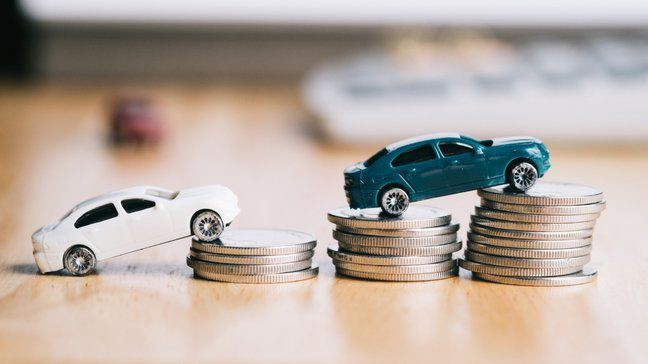

In [37]:
from IPython.display import Image
Image("car.jpeg")

# Introduction

The objective of this kernel is to use an example of vehicles and help reach a good r2 score using basic regression model upon various Data.viz techniques.

Hence,for instance, we get data from the car website CarDekho.com, filled with information on a wide variety of cars, including their selling price and present price. We realize that we can use this data to make sure we get a good deal on a new car. In particular, we can figure out exactly how much one should pay for a specific type of car. Now Comes the Linear Regression to our rescue!

## About the dataset


This dataset contains information about used cars listed on www.cardekho.com This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning. The columns in the given dataset is as follows:

- Car_Name
- Year
- Selling_Price
- Present_Price
- Kms_Driven
- Fuel_Type
- Seller_Type
- Transmission
-Owner

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

## Load the Dataset

In [2]:
df_main = pd.read_csv('car data.csv')
df_main.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


## Data Inspection

In [3]:
df_main.shape

(301, 9)

In [4]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#numerical stats
df_main.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Checking Null values
df_main.isnull().sum()*100/df_main.shape[0]

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

## Data Preprocessing

In [7]:
df_main['Age'] = 2020 - df_main['Year']
df_main.drop('Year',axis=1,inplace = True)

In [8]:
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [9]:
df_main.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

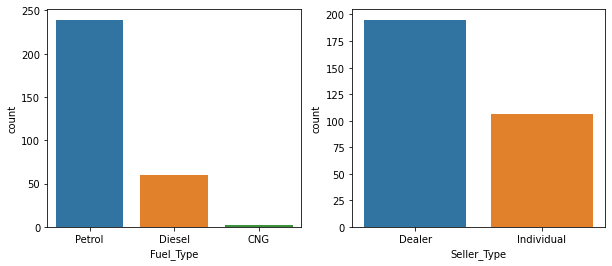

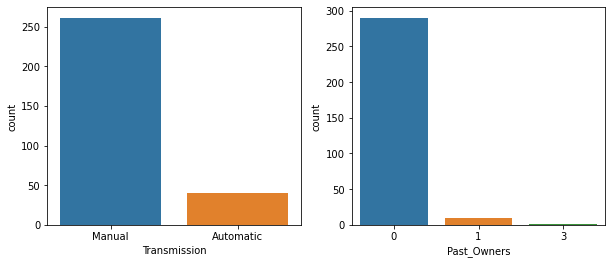

In [10]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.show()

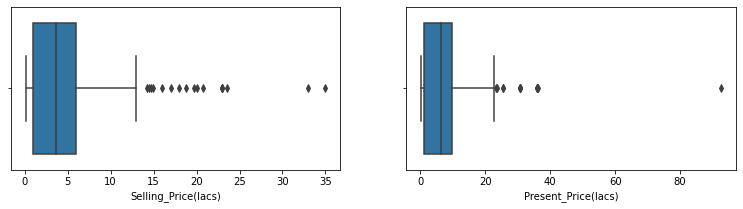

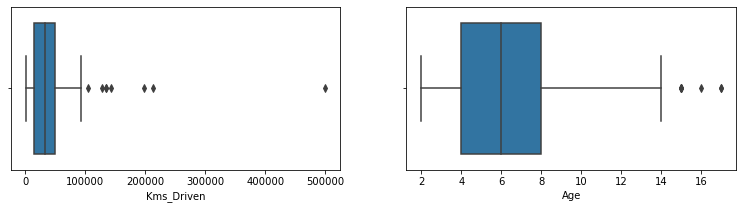

In [11]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
  
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1
    
    plt.show()

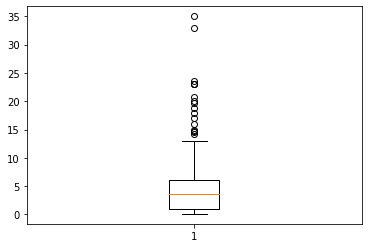

In [12]:
# outlier treatment for Selling_Price
plt.boxplot(df_main["Selling_Price(lacs)"])
Q1 = df_main["Selling_Price(lacs)"].quantile(0.25)
Q3 = df_main["Selling_Price(lacs)"].quantile(0.75)
IQR = Q3 - Q1
df_main = df_main[(df_main["Selling_Price(lacs)"] >= Q1 - 1.5*IQR) & (df_main["Selling_Price(lacs)"] <= Q3 + 1.5*IQR)]

## Bivariate/Multi-Variate Analysis

### Visualising Numeric Variables

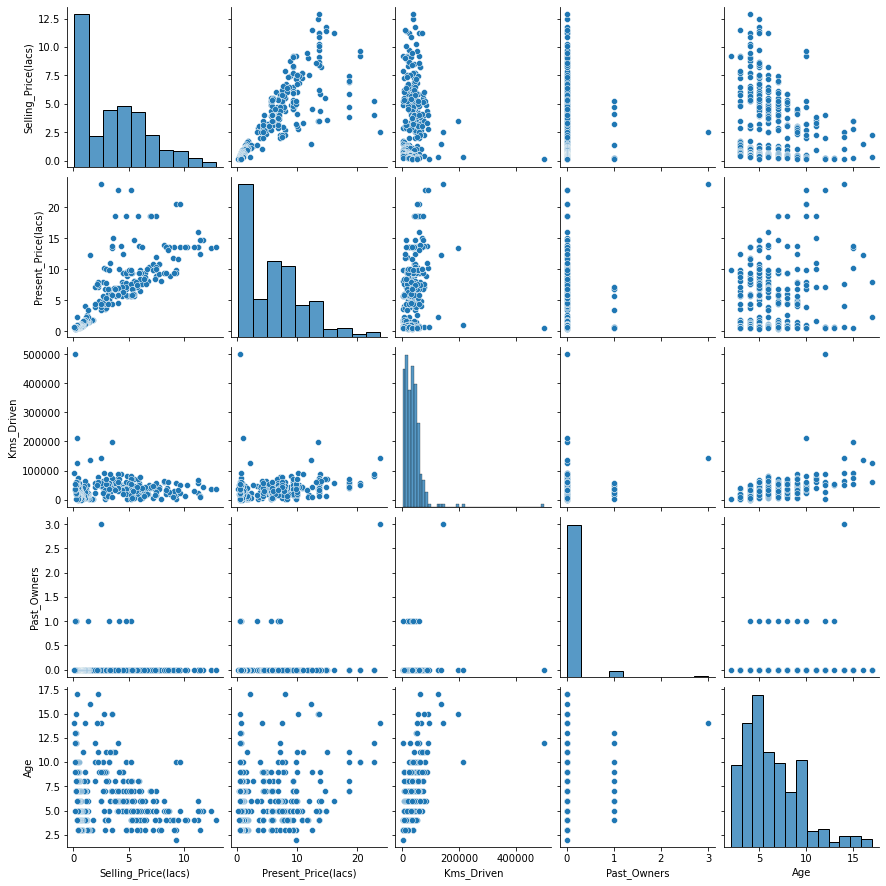

In [13]:
sns.pairplot(df_main)
plt.show()

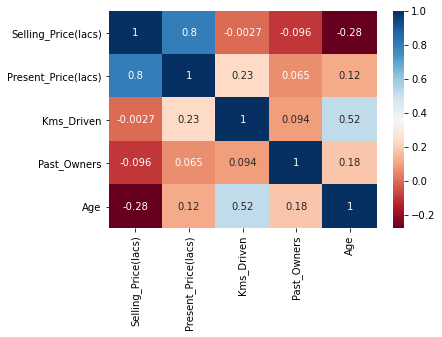

In [14]:
sns.heatmap(df_main.corr(), annot=True, cmap="RdBu")
plt.show()

In [15]:
df_main.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.801950
Kms_Driven            -0.002729
Past_Owners           -0.095591
Age                   -0.279578
Name: Selling_Price(lacs), dtype: float64

In [16]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,6.92587,4.983359
Individual,NaN,NaN,0.726857


In [17]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,6.059412,5.398765
Individual,0.565000,0.743895


### Data Preparation

## Creating Dummies for Categorical Features

In [18]:
df_main.drop(labels='Car_Name',axis= 1, inplace = True)

In [19]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [20]:
df_main = pd.get_dummies(data = df_main,drop_first=True) 

In [21]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


##  Splitting the Data into Training and Testing Sets


In [22]:
# Separating target variable and its features
y = df_main['Selling_Price(lacs)']
X = df_main.drop('Selling_Price(lacs)',axis=1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (213, 8)
x test:  (71, 8)
y train:  (213,)
y test:  (71,)


## Build the Model

### Applying regression models

In [25]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [26]:
CV = []
R2_train = []
R2_test = []
mae_train=[]
mse_train=[]
mae_test=[]
mse_test=[]

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # Mean Squared error  of train set
    mse_train_model = mean_squared_error(y_train,y_pred_train)
    mse_train.append(round(mse_train_model,2))
    
    # Mean absolute error of train set
    mae_train_model = mean_absolute_error(y_train,y_pred_train)
    mae_train.append(round(mae_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # Mean Squared error of test set
    mse_test_model = mean_squared_error(y_test,y_pred_test)
    mse_test.append(round(mse_test_model,2))
    
    # Mean absolute error of train set
    mae_test_model = mean_absolute_error(y_test,y_pred_test)
    mae_test.append(round(mae_test_model,2))
    
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train Mean absolute error :",round(mae_train_model,2))
    print("Test Mean absolute error :",round(mae_test_model,2))
    print("Train Mean Squared error :",round(mse_train_model,2))
    print("Test Mean Squared error :",round(mse_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

## Standard Linear Regression or Ordinary Least Squares

Train R2-score : 0.86
Test R2-score : 0.76
Train Mean absolute error : 0.85
Test Mean absolute error : 1.04
Train Mean Squared error : 1.32
Test Mean Squared error : 2.19
Train CV scores : [0.81603113 0.82455461 0.81331552 0.83659651 0.85408004]
Train CV mean : 0.83


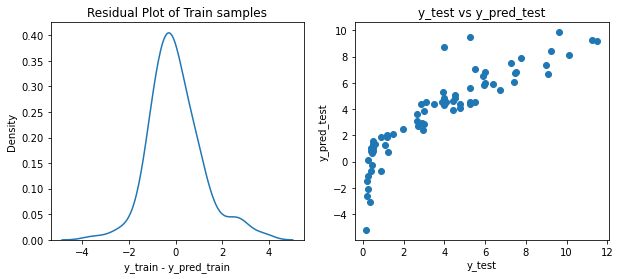

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

## Ridge

Train R2-score : 0.86
Test R2-score : 0.76
Train Mean absolute error : 0.85
Test Mean absolute error : 1.04
Train Mean Squared error : 1.32
Test Mean Squared error : 2.19
Train CV scores : [0.80147257 0.82245914 0.81341133 0.83655619 0.80747723]
Train CV mean : 0.82


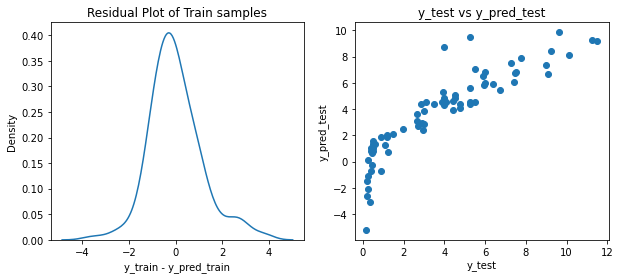

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

## Lasso

Train R2-score : 0.86
Test R2-score : 0.76
Train Mean absolute error : 0.86
Test Mean absolute error : 1.04
Train Mean Squared error : 1.33
Test Mean Squared error : 2.19
Train CV scores : [0.81202911 0.82201423 0.8245812  0.83825476 0.83019332]
Train CV mean : 0.83


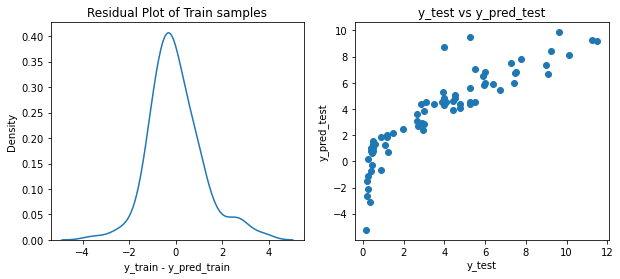

In [29]:
from sklearn.linear_model import Lasso
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

Train R2-score : 0.96
Test R2-score : 0.91
Train Mean absolute error : 0.39
Test Mean absolute error : 0.52
Train Mean Squared error : 0.38
Test Mean Squared error : 0.86
Train CV scores : [0.94188421 0.92787362 0.92952311 0.95008729 0.88129974]
Train CV mean : 0.93


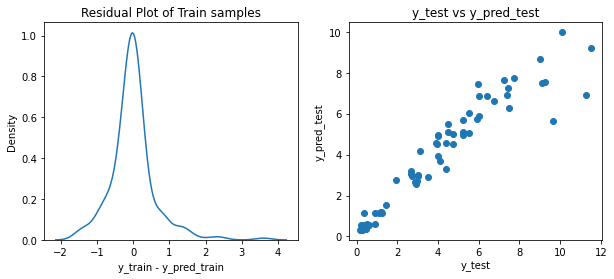

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_pred_model(rf_rs,'random_forest.pkl')

## Model Results

In [33]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV,
                     "mae_train":mae_train,"mse_train":mse_test,"mae_test":mae_test,"mse_test":mse_test})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train),mae_train,mse_train,mae_test,mse_test
0,LinearRegression,0.86,0.76,0.83,0.85,2.19,1.04,2.19
1,Ridge,0.86,0.76,0.82,0.85,2.19,1.04,2.19
2,Lasso,0.86,0.76,0.83,0.86,2.19,1.04,2.19
3,RandomForestRegressor,0.96,0.91,0.93,0.39,0.86,0.52,0.86


## Conclusions:
- Present price of a car plays an important role in predicting Selling Price, One increases the other gradually increases.
- Car age is effecting negatively as older the car lesser the Selling Price.
- Selling Price of cars with Fuel type Diesel is higher.
- Car of Manual type is of less priced whereas of Automatic type is high.
- Cars sold by Individual tend to get less Selling Price when sold by Dealers.

## RandomForestRegressor performs considerably better than Linear Regression with a R2 score of 0.96 compared to 0.86.

## Thank you!